In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
o2_lim_arr=np.empty([0,2])
for ulim_Tpro in np.arange(0.1,1,0.2):
    for ulim_Tneg in np.arange(0.1,1,0.2):
        o2_lim_arr=np.append(o2_lim_arr,[[ulim_Tpro,ulim_Tneg]],axis=0)

## Pairwise Tp & T- (Tp testosterone independent)

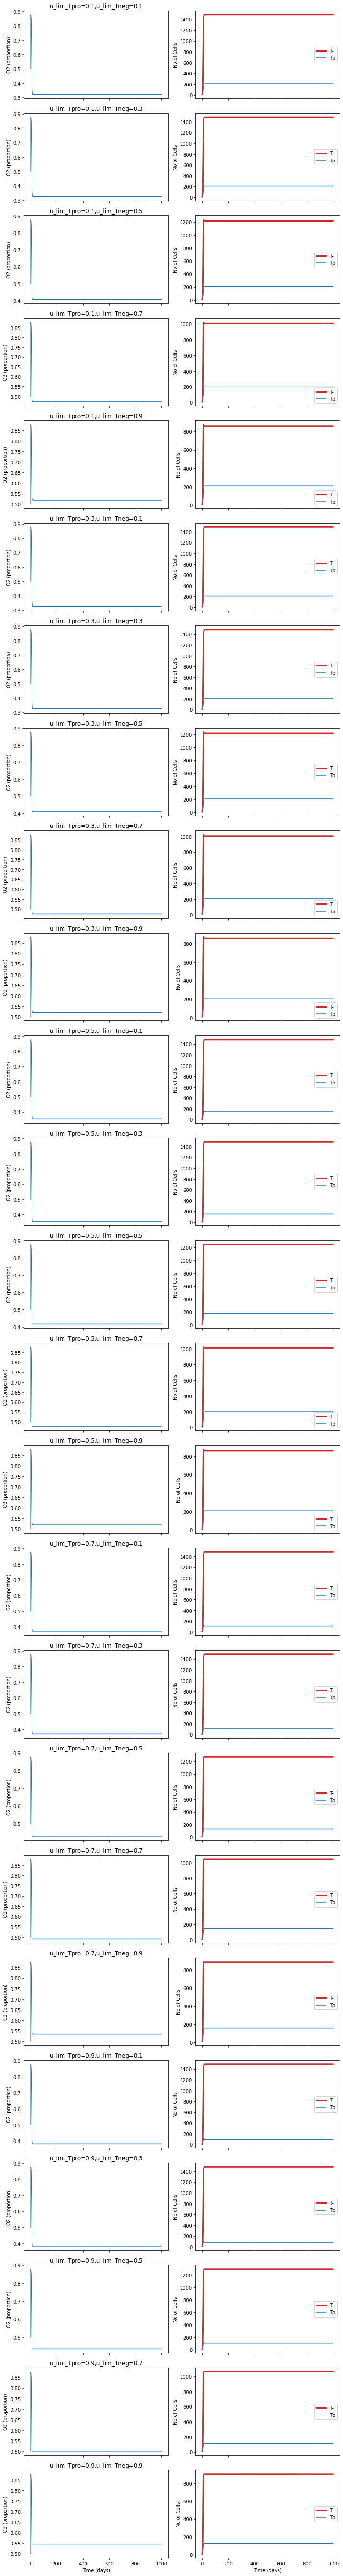

In [3]:
lis=[]
fig,ax=plt.subplots(25,2,sharex=True,figsize=(10,75))
i=0
for o2_lim in o2_lim_arr:
    df=pd.read_csv("../raw_output/EnvEq/pairwise/Tneg-Tpro/u_lim_o2Tpro-u_lim_o2Tneg/testindep-"+"{:.1f}".format(o2_lim[0])+"-"+"{:.1f}".format(o2_lim[1])+'.csv')
    lis.append([o2_lim[0],o2_lim[1],df.o2.iloc[-1],df.Tpro.iloc[-1],df.Tneg.iloc[-1]])
    ax[i,0].plot(df.t/24/60,df.o2,color="tab:blue")
    ax[i,0].set_ylabel("O2 (proportion)")
    ax[i,0].set_title("u_lim_Tpro="+"{:.1f}".format(o2_lim[0])+",u_lim_Tneg="+"{:.1f}".format(o2_lim[1]))
    ax[i,1].plot(df.t/24/60,df.Tneg,color="tab:red",label='T-',linewidth=3)
    ax[i,1].plot(df.t/24/60,df.Tpro,color="tab:blue",label='Tp')
    ax[i,1].legend()
    ax[i,1].set_ylabel("No of Cells")
    i+=1
ax[i-1,0].set_xlabel('Time (days)')
ax[i-1,1].set_xlabel('Time (days)')
fig.tight_layout()

In [4]:
fig.savefig('../figures/EnvEq/pairwise/Tneg-Tpro/u_lim_o2Tpro-u_lim_o2Tneg/testindep-timeseries.svg')

In [5]:
df=pd.DataFrame(lis,columns=['u_lim_o2Tpro','u_lim_o2Tneg','o2_eq','Tpro_eq','Tneg_eq'])
df.to_csv('../analysed_data/EnvEq/pairwise/Tneg-Tpro/u_lim_o2Tpro-u_lim_o2Tneg/testindep-eq_values.csv',index=False)

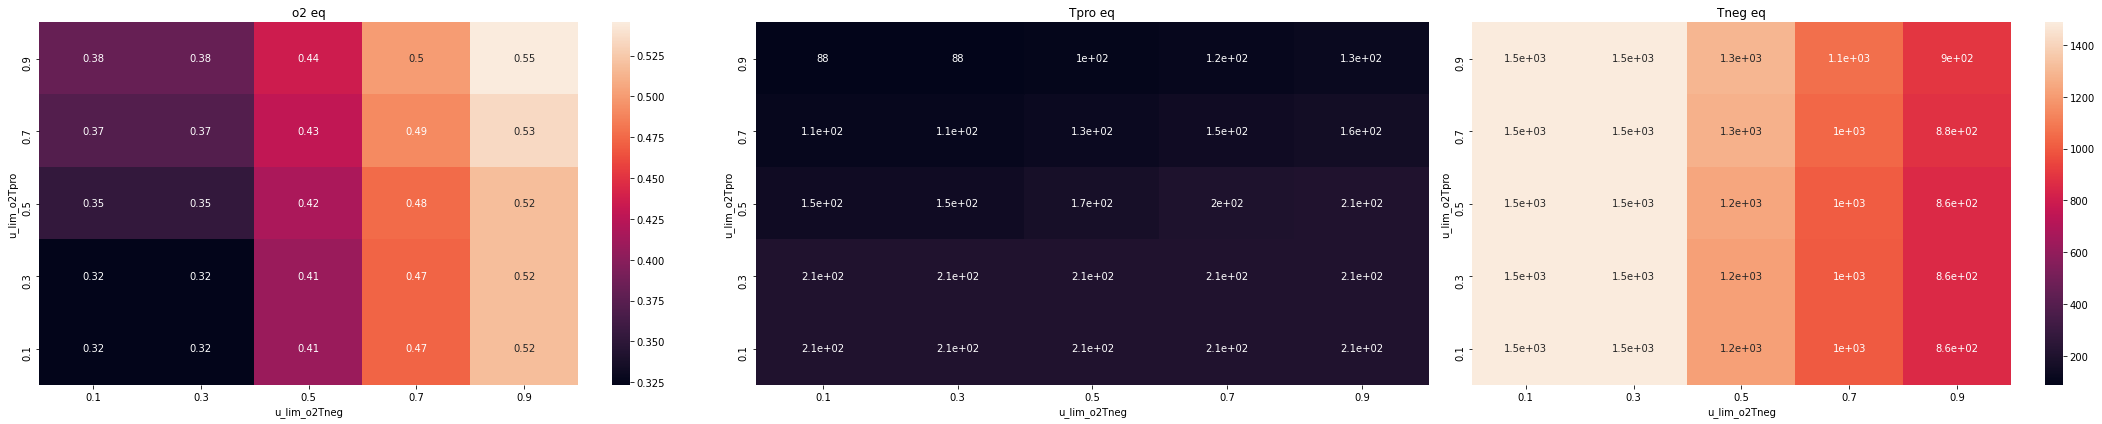

In [6]:
fig,ax1=plt.subplots(1,3,figsize=(30,6))
df['u_lim_o2Tpro']=df['u_lim_o2Tpro'].round(1)
df['u_lim_o2Tneg']=df['u_lim_o2Tneg'].round(1)
o2df=df.pivot("u_lim_o2Tpro", "u_lim_o2Tneg", "o2_eq").sort_index(ascending=False)
Tprodf=df.pivot("u_lim_o2Tpro", "u_lim_o2Tneg", "Tpro_eq").sort_index(ascending=False)
Tnegdf=df.pivot("u_lim_o2Tpro", "u_lim_o2Tneg", "Tneg_eq").sort_index(ascending=False)
ax1[1].get_shared_y_axes().join(ax1[2])
sns.heatmap(o2df,annot=True,ax=ax1[0])
ax1[0].set_title("o2 eq")
sns.heatmap(Tprodf,annot=True,ax=ax1[1],vmin=min(min(df.Tpro_eq),min(df.Tneg_eq)),vmax=max(max(df.Tpro_eq),max(df.Tneg_eq)),cbar=False)
ax1[1].set_title("Tpro eq")
sns.heatmap(Tnegdf,annot=True,ax=ax1[2],vmin=min(min(df.Tpro_eq),min(df.Tneg_eq)),vmax=max(max(df.Tpro_eq),max(df.Tneg_eq)))
ax1[2].set_title("Tneg eq")
fig.tight_layout()

In [7]:
fig.savefig('../figures/EnvEq/pairwise/Tneg-Tpro/u_lim_o2Tpro-u_lim_o2Tneg/testindep-eq-vs-lims.svg')